# Homework 4: Steady-sate momentum principles (no friction)

## Problem 1

**3.1 of Moglen (2015)**

Given a rectangular channel with q = 10, 20, and 30 ft2/s, calculate 
the momentum function over a range of depths, y, from 0 to 8 feet. 
Make a plot with the momentum function on the horizontal axis and 
y on the vertical axis. To make the graph easily viewable, please limit 
the horizontal axis so it covers only 0 ≤ M ≤ 30 ft2. Please be sure to 
label your axes and clearly indicate the q value for each of the three 
curves

**Generic Momentum Equation**
$$
M = A y + \frac{Q^2}{gA}
$$

**Momentum Equation For Rectangular Cross Section**
$$
M = \frac{y^2+b}{2} + \frac{ \mathcal{B} q^2b}{gy}
$$

or 

**Moglen (2015) 3.7**
$$
M = \frac{y^2}{2} + \frac{q^2}{gy}
$$

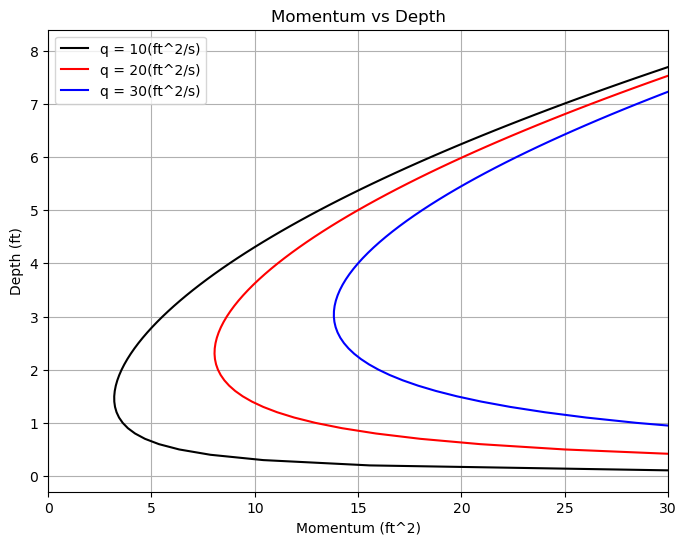

In [197]:
import numpy as np
import matplotlib.pyplot as plt

depth = np.arange(0.1, 8.1, 0.1)

q_1 = 10
q_2 = 20
q_3 = 30
g = 32.1741

M_1 = []
M_2 = []
M_3 = []

for x in depth:
    M_one = (x**2)/2 + (q_1**2)/(g*x)
    M_1.append(M_one)

for x in depth:
    M_two = (x**2)/2 + (q_2**2)/(g*x)
    M_2.append(M_two)
    
for x in depth:
    M_three = (x**2)/2 + (q_3**2)/(g*x)
    M_3.append(M_three)

plt.figure(figsize=(8,6))
plt.plot(M_1, depth, color="black", label="q = 10(ft^2/s)")
plt.plot(M_2, depth, color="red", label="q = 20(ft^2/s)")
plt.plot(M_3, depth, color="blue", label="q = 30(ft^2/s)")
plt.xlabel('Momentum (ft^2)')
plt.ylabel('Depth (ft)')
plt.title('Momentum vs Depth')
plt.xlim(0,30)
plt.grid(True)
plt.legend()
plt.show()


## Problem 2

Using the same three conditions for q as in the problem above, plot both the E and M functions on the same figure. Your vertical axis should have y [ft], and your horizontal axis will have both E [ft] and M [ft2].

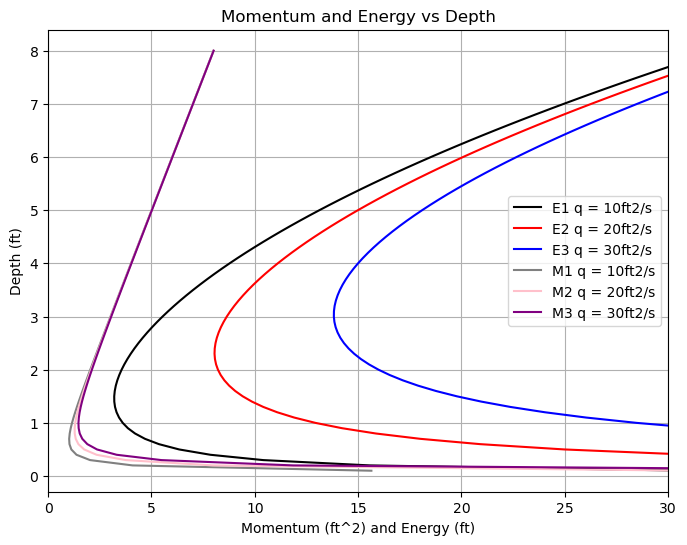

In [198]:
import numpy as np
import matplotlib.pyplot as plt

depth = np.arange(0.1, 8.1, 0.1)

q_1 = 10
q_2 = 20
q_3 = 30
g = 32.1741

#M equations
M_1 = []
M_2 = []
M_3 = []

for x in depth:
    M_one = (x**2)/2 + (q_1**2)/(g*x)
    M_1.append(M_one)

for x in depth:
    M_two = (x**2)/2 + (q_2**2)/(g*x)
    M_2.append(M_two)
    
for x in depth:
    M_three = (x**2)/2 + (q_3**2)/(g*x)
    M_3.append(M_three)

#E equations 
E_1 = []
E_2 = []
E_3 = []

for x in depth:
    E_one = x + (q_1)/(2*g*x**2)
    E_1.append(E_one)

for x in depth:
    E_two = x + (q_2)/(2*g*x**2)
    E_2.append(E_two)

for x in depth:
    E_three = x + (q_3)/(2*g*x**2)
    E_3.append(E_three)


plt.figure(figsize=(8,6))
plt.plot(M_1, depth, color="black", label="E1 q = 10ft2/s")
plt.plot(M_2, depth, color="red", label="E2 q = 20ft2/s")
plt.plot(M_3, depth, color="blue", label="E3 q = 30ft2/s")
plt.plot(E_1, depth, color="gray", label="M1 q = 10ft2/s")
plt.plot(E_2, depth, color="pink", label="M2 q = 20ft2/s")
plt.plot(E_3, depth, color="purple", label="M3 q = 30ft2/s")
plt.xlabel('Momentum (ft^2) and Energy (ft)')
plt.ylabel('Depth (ft)')
plt.title('Momentum and Energy vs Depth')
plt.xlim(0,30)
plt.grid(True)
plt.legend()
plt.show()


## Problem 3

**3.5 of Moglen (2015)**

A hydraulic jump is formed in a 5 meter wide outlet at a short distance downstream of a control (sluice) gate. If the flow depth upstream of the gate is 9 meters and the discharge is 150 m3/s, find (1) the flow depth just downstream of the gate, (2) the flow depth downstream of the jump, 3) the thrust on the gate, and 4) the head losses in the jump.

### 1) the flow depth just downstream of the gate

$$
E_1 = E_2
$$

$$
E_1 = y + \frac{q^2}{2gy^2} = E_2
$$

$$
y^3 - E \cdot y^2 + \frac{q^2}{2g} = 0
$$

In [199]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve

b = 5
y_1 = 9
Q = 150
g = 9.81
q = Q / b
A = b * y_1
E_1 = y_1 + Q**2 / (2 * g * A**2)

# y-crit between point 1 and 2
def y_crit(f, Q, y_1, b, g):
    v_1 = Q / (y_1 * b)
    return(1 - (v_1 / (g * f)**0.5))
y_crit_guess = 2
y_c = fsolve(y_crit, y_crit_guess, args=(Q, y_1, b, g))

print("Critical Depth =", y_c)

def energy_eq_1(f, E_1, q, g ):
    return(f**3 - E_1 * f**2 + q**2 / (2*g))

if y_1 < y_c:
    f_guess = y_c * 1.1
else: 
    f_guess = y_c * 0.5

y_2 = fsolve(energy_eq_1, f_guess, args=(E_1, q, g))

print("Specific Energy =", E_1)
print("Depth Directly Down Stream (Alternate Depth)=", y_2)

Critical Depth = [1.1326311]
Specific Energy = 9.566315551025031
Depth Directly Down Stream (Alternate Depth)= [2.55846397]


### 2) the flow depth downstream of the jump

$$
y_2 = y_3
$$

$$
F_r = \frac{q}{\sqrt{g \cdot y^3}}
$$

$$
m_3 = m_4
$$

$$
\frac{y_4}{y_3} = \frac{1}{2} \left( -1 + \sqrt{1 + 8 \cdot {F_{r3}}^2} \right)
$$

In [200]:
import math

b = 5
y_1 = 9
Q = 150
q_1 = Q / b
g = 9.81
A_1 = y_1 * b
E_1 = y_1 + q_1**2 / (2*g*y_1**2)
y_2 = 2.55846397140319
y_3 = y_2

Fr_3 = q_1 / (g * y_3**3)**0.5


y_4 = 0.5*(-1 + math.sqrt(1 + 8 * Fr_3**2))*y_3


print(y_4)
print("Depth Down Stream of Jump (m) =", round(y_4, 2))

7.285450005292323
Depth Down Stream of Jump (m) = 7.29


### 3) the thrust on the gate

$$
M_1 = M_2 + \frac{F_{gate}}{\rho g}
$$

$$
M = \frac{b \cdot y^2}{2} + \frac{b \cdot q^2}{g \cdot y}
$$

$$
F_{gate} = \left( M_1 - M_2 \right) \rho g
$$

$$
F_{gate} = \left[ \left( \frac{b \cdot {y_1}^2}{2} + \frac{b \cdot q^2}{g \cdot y_1} \right) - \left( \frac{b \cdot {y_2}^2}{2} + \frac{b \cdot q^2}{g \cdot y_2} \right) \right] \rho g
$$

In [201]:
import sympy as sp
import math

b = 5
y_1 = 9
Q = 150
q = Q / b
g = 9.81
y_2 = 2.55846397140319
r = 1000 #density of water in kg/m3

M_1 = (b * y_1**2)/2 + (b* q**2)/ (g * y_1)
M_2 = (b * y_2**2)/2 + (b* q**2)/ (g * y_2)

F_gate = (M_1 - M_2)* r * g

print("Thrust on gate (N)=", round(F_gate))

Thrust on gate (N)= 567123


### 4) the head losses in the jump
$$
h_{Lj} = \frac{(y_2 - y_1)^3}{4y_1y_2}
$$

In [202]:
y_2 = 2.55846397140319
y_3 = y_2
y_4 = 7.285450005292323

h_Lj = ((y_4 - y_3)**3)/ (4 * y_3 * y_4)

print("Head loss in jump (m) = ", round(h_Lj, 2))

Head loss in jump (m) =  1.42


## Problem 4

Write a computer program that finds the sequent depth for a hydraulic jump in a trapezoidal channel if either the sub or supercritical depth is given. Hint, in the code, calculate the critical depth first and compare it to the given depth to help you limit the search for the correct sequent depth root. Test your solver with the following values: Q = 10 m3/s, y = 0.5 m, b = 5 m, and m = 2.

$$
M = y \cdot A + \frac{B \cdot Q^2}{g \cdot A}
$$

$$
A = (b + my)y
$$

$$
F_{rc} = 1 = \frac{Q}{A \cdot \sqrt{g \cdot A / T}}
$$

$$
\frac{Q^2}{g} = \frac{A^3}{T}
$$

$$
0 = m_1 - \bar y \cdot A + \frac{Q^2}{g \cdot A}
$$

In [203]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve


Q = 10
y = 0.5
b = 5
m = 2
g = 9.81


#input variable area and top width solutions
A = (b + m * y)*y
B = (b + 2 * m * y)

#implicit solutions for y_crit area and top width
def y_crit(f, Q, b, m, g):
    A_c = (b + m * f)*f
    B_c = (b + 2 * m * f)
    return (((Q**2)/g) * B_c - A_c**3)
y_crit_guess = 0.4
y_c = fsolve(y_crit, y_crit_guess, args=(Q, b, m, g))

# Sequent depth solver
def sequent_depth(f, y, b, B, Q, g):
    y_cen = y*(2 * b + B)/ (3 * b + 3 * B)
    m_o = y_cen * A + (Q**2)/(g * A)
    y_cent_s = f*(2 * b + B)/ (3 * b + 3 * B)
    A_s = (b + m * f)*f
    B_s = (b + 2 * m * f)
    return(m_o - (y_cent_s * A_s + ((Q**2) / (g * A_s))))

if y > y_c:
    y_s_guess = y_c * 0.5
    print("Flow at given depth is Supercritical & Flow at Sequent Depth is Subcritical")
else: 
    y_s_guess = y_c * 1.5
    print("Flow at given depth is Subcritical & Flow at Sequent Depth is Supercritical")

y_s = fsolve(sequent_depth, y_s_guess, args=(y, b, B, Q, g))

# froude number crit depth test
A_crit = (b + m * y_c)* y_c
B_crit = (b + 2 * m * y_c)
test_Fr = Q / (A_crit * (g * (A_crit / B_crit))**0.5)
print("Crit Froude Number Check =", test_Fr)

print("Critical Depth", y_c)
print("Sequent Depth (m) =", y_s)

Flow at given depth is Subcritical & Flow at Sequent Depth is Supercritical
Crit Froude Number Check = [1.]
Critical Depth [0.67433325]
Sequent Depth (m) = [0.85870399]


## Problem 5

**3.7 of Moglen (2015)**

hydraulic jump occurs in a trapezoidal channel with a base width b = 20 feet and side-slope parameter, m = 2. The downstream depth is 8 feet, and the discharge is 1000 ft3/s. Find the upstream depth, the head loss, and the horsepower dissipated in the jump. (Note that Figure 3.10 assumes that the upstream depth, y1, is known.) Since y1 is unknown in this problem, your solution will need to be iterative if using the figure. Alternatively, you can approach the problem using M1 = M2 and the Goal Seek function. Reminder: Horsepower (hp) is calculated as:

$$
h_p = \frac{\gamma \cdot Q \cdot \Delta h}{550}
$$

that is, $1 h_p = 550 ft-lb/s$

### 1) upstream depth

In [204]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve


Q = 1000
y = 2
b = 20
m = 2
g = 32.1741


#input variable area and top width solutions
A = (b + m * y)*y
B = (b + 2 * m * y)

#implicit solutions for y_crit area and top width
def y_crit(f, Q, b, m, g):
    A_c = (b + m * f)*f
    B_c = (b + 2 * m * f)
    return (((Q**2)/g) * B_c - A_c**3)
y_crit_guess = y
y_c = fsolve(y_crit, y_crit_guess, args=(Q, b, m, g))

# Sequent depth solver
def sequent_depth(f, y, b, B, Q, g):
    y_cen = y*(2 * b + B)/ (3 * b + 3 * B)
    m_o = y_cen * A + (Q**2)/(g * A)
    y_cent_s = f*(2 * b + B)/ (3 * b + 3 * B)
    A_s = (b + m * f)*f
    B_s = (b + 2 * m * f)
    return(m_o - (y_cent_s * A_s + ((Q**2) / (g * A_s))))

if y > y_c:
    y_s_guess = y_c * 0.5
    print("Flow at given depth is Supercritical & Flow at Sequent Depth is Subcritical")
else: 
    y_s_guess = y_c * 1.5
    print("Flow at given depth is Subcritical & Flow at Sequent Depth is Supercritical")

y_s = fsolve(sequent_depth, y_s_guess, args=(y, b, B, Q, g))

# froude number crit depth test
A_crit = (b + m * y_c)* y_c
B_crit = (b + 2 * m * y_c)
test_Fr = Q / (A_crit * (g * (A_crit / B_crit))**0.5)
#print("Crit Froude Number Check =", test_Fr)

print("Critical Depth", y_c)
print("Sequent Depth (m) =", y_s)

Flow at given depth is Subcritical & Flow at Sequent Depth is Supercritical
Critical Depth [3.74101671]
Sequent Depth (m) = [5.92588246]


### 2) head loss

$$
E_1 - E_2 = h_{Lj}
$$

$$
\left( y_1 + \frac{Q^2}{2g{A_1}^2} \right) - \left( y_2 + \frac{Q^2}{2g{A_2}^2} \right) = h_{Lj}
$$

In [205]:
Q = 1000
b = 20
m = 2
g = 32.1741

y_2 = 8
y_1 = 5.92588246

A_2 = (b + m * y_1)*y_1
A_1 = (b + m * y_2)*y_2

h_Lj = (y_2 + (Q**2)/ (2 * g * A_2**2)) - (y_1 + (Q**2)/ (2 * g * A_1**2))


print("Head loss in jump (m) = ", round(h_Lj, 2))

Head loss in jump (m) =  2.32


### 3) horsepower dissipated in the jump

$$
h_p = \frac{\gamma \cdot Q \cdot \Delta h}{550}
$$

that is, $1 h_p = 550 ft-lb/s$

In [206]:
Q = 1000
h_Lj = 2.32
gamma = 62.43 # specific weight of water in pounds force per cubic foot

h_p = (gamma * Q * h_Lj)/550

print("Horsepower Displacement (hp) =", round(h_p, 2))

Horsepower Displacement (hp) = 263.34


## Problem 6

What is a tidal bore, why does it form, and how fast does it move?

A tidal bore is a wave that moves in the direction oposite of the main flow of a channel. Tidal bores occur in rivers and other bodies of water flowing into a larger coastal body of water. The change in volume from a channalized river to a larger body creates a grade in the free surface of the water which is greater than the froude number, sending a subsiquent wave in the upstream direction of the rivers flow. The speed of a tidal bore can vary greatly and is dependant on the channel geometry of the channel and larger body of water as well as the velocitiy of the downstream component of the river.

## Problem 7 

(Graduate Students Only) An 8 ft deep uniform flow approaches a sluice gate at a velocity of 3 ft/s. At time equals zero, the sluice gate is suddenly shut. This produces a surge that then propagates back upstream at a velocity of Vs. Use the conservation of mass and momentum to find the upstream propagation speed of the bore and the resultant depth of flow downstream
of the surge front. Hint, use a moving frame of reference.

t = 0 $\rightarrow$ v= 3ft/s and y = 8 ft

t > 0 $\rightarrow$ y = m_1 - m_2

t > 0 $\rightarrow$ $\frac{y_2}{y_1} = \frac{1}{2} \cdot \left( -1 + \sqrt{1 + 8 \cdot {F_{r2}}^2} \right)$

t > 0 $\rightarrow$ $v = v_1 - c_o = v_1 - \sqrt{gy}$

In [207]:
y_1 = 8
v_1 = 3
q = y_1 * v_1
g = 32.1741
F_r = v_1 / (g * y_1)**0.5

y_2 = (0.5 *(-1 + (1 + 8 * F_r**2)**0.5)) * y_1

h = y_1 - y_2
c_o = (g * (h))**0.5

v_2 = c_o - v_1

print("Froude number =", round(F_r, 2))
print("Small wave celerity =", round(c_o,2 ))
print("Initial Velocity Upstream (ft/s)=", round(v_2,2))
print("Depth in front of surge front (ft)=", round(y_2,2))

Froude number = 0.19
Small wave celerity = 15.51
Initial Velocity Upstream (ft/s)= 12.51
Depth in front of surge front (ft)= 0.53


## Problem 8

(10 pt Extra Credit) Derive the head loss term for a hydraulic jump in a rectangular channel. That is, show all the steps that lead to:

$$
h_{Lj} = \frac{(y_2 - y_1)^3}{4y_1y_2}
$$

Using energy and momentum equations

$$
E_1 - E_2 = h_{Lj}
$$

$$
\left( y_1 + \frac{q^2}{2g{y_1}^2} \right) - \left( y_2 + \frac{q^2}{2g{y_2}^2} \right) = h_{Lj}
$$

$\downarrow$ solve for $q^2$ using momentum equation

$$
m_1 = m_2
$$

$$
\frac{b \cdot {y_1}^2}{2} + \frac{b \cdot q^2}{q \cdot y_1} = \frac{b \cdot {y_2}^2}{2} + \frac{b \cdot q^2}{q \cdot y_2}
$$

$$
q^2 = \frac{1}{2} \cdot y_1 \cdot y_2 \cdot g \cdot (y_2 + y_1)
$$

$\downarrow$ plug in $q^2$ into energy equation for head loss

$$
$$

$$
\left( y_1 + \frac{\frac{1}{2} \cdot y_1 \cdot y_2 \cdot g \cdot (y_2 + y_1)}{2g{y_1}^2} \right) - \left( y_2 + \frac{\frac{1}{2} \cdot y_1 \cdot y_2 \cdot g \cdot (y_2 + y_1)}{2g{y_2}^2} \right) = h_{Lj}
$$

$$
$$

$$
y_1 - y_2 + \frac{y_2 \cdot (y_2 + y_1)}{4y_1} - \frac{y_1 \cdot (y_2 + y_1)}{4y_2} = 
$$

$$
$$

$$
\left( y_1 \cdot \frac{4y_1y_2}{4y_1y_2} \right) - \left( y_2 \cdot \frac{4y_1y_2}{4y_1y_2} \right) + \left( \frac{y_2 \cdot (y_2 + y_1)}{4y_1} \cdot \frac{y_2}{y_2} \right) - \left( \frac{y_1 \cdot (y_2 + y_1)}{4y_2} \cdot \frac{y_1}{y_1} \right) = 
$$

$$
$$

$$
\left( \frac{4{y_1}^2y_2}{4y_1y_2} \right) - \left( \frac{4y_1{y_2}^2}{4y_1y_2} \right) + \left( \frac{{y_2}^2 \cdot (y_2 + y_1)}{4y_1y_2} \right) - \left( \frac{{y_1}^2 \cdot (y_2 + y_1)}{4y_1y_2} \right) = 
$$

$$
$$

$$
\frac{{y_2}^3 - 3{y_2}^2y_1 + 3y_2{y_1}^2 - {y_1}^3}{4y_1y_2} = 
$$

$$
$$

$$
\boxed{
\frac{(y_2 - y_1)^3}{4y_1y_2} = h_{Lj}
}
$$